# Práctica 4
- - -
Imágenes a tensores, slicing en colores

In [2]:
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

In [3]:
img = Image.open("AL_P3extra_foto.jpg")

In [4]:
M = np.array(img)

In [4]:
M.shape

(408, 612, 3)

In [5]:
M[:,:,0]

array([[135, 135, 121, ...,  39,  48,  50],
       [139, 130, 131, ...,  36,  39,  39],
       [145, 142, 149, ...,  18,  14,  12],
       ...,
       [117, 115, 116, ..., 230, 230, 138],
       [118, 118, 120, ..., 214, 197,  70],
       [120, 120, 124, ..., 224, 211,  74]], dtype=uint8)

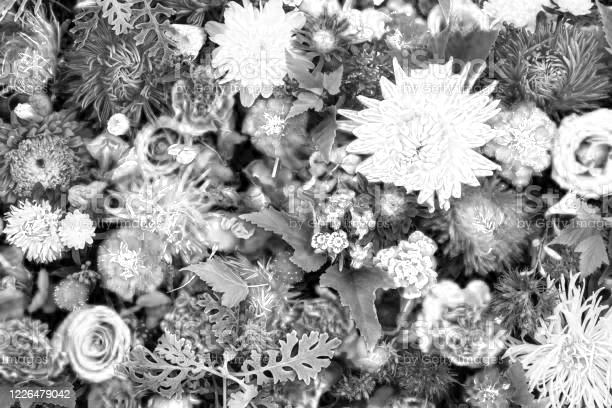

In [6]:
Image.fromarray(M[:,:,0])

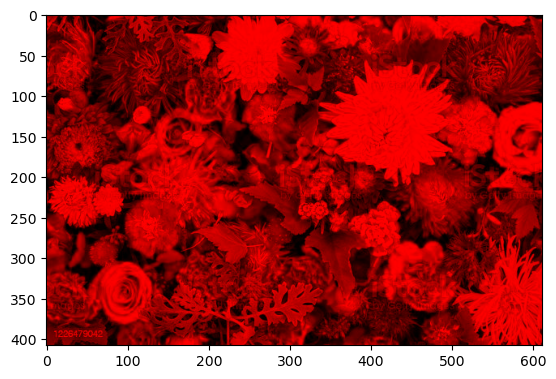

In [20]:
c = 0
A = np.zeros(M.shape) # Matriz de ceros
A[:,:,c] = M[:,:,c]/255 # Copia de la matriz M[:,:,c] normalizada
imshow(A)

## Factorización LU
- - -

In [2]:
import numpy as np
from scipy import linalg

In [5]:
# Plantear el sistema de ecuaciones Ax = b
A = np.array(
    [
        [1, 2, -3, 2],
        [1, 2, -3, 4],
        [1, 6, -6, 6],
        [2, -4, 5, 10],
    ]
)
b = np.array([0, 0, 1, 3])


In [6]:
P, L, U = linalg.lu(A)
print(P, L, U)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]] [[1.  0.  0.  0. ]
 [0.5 1.  0.  0. ]
 [0.5 0.5 1.  0. ]
 [0.5 0.5 1.  1. ]] [[ 2.   -4.    5.   10.  ]
 [ 0.    8.   -8.5   1.  ]
 [ 0.    0.   -1.25 -1.5 ]
 [ 0.    0.    0.   -2.  ]]


In [11]:
print(P@L@U) # = A. Producto 1 de tensores, axes=1

[[ 1.  2. -3.  2.]
 [ 1.  2. -3.  4.]
 [ 1.  6. -6.  6.]
 [ 2. -4.  5. 10.]]


In [8]:
# Inversa de P para multiplicarla por A
pInv = np.linalg.inv(P)

In [11]:
# Asegurarse que la inversa es correcta
print(pInv@P == np.eye(4))

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [14]:
# Relizar la permutación en b
Pb = pInv@b
print(Pb)

[3. 1. 0. 0.]


In [15]:
# Resolver el sistema de L (Ly = Pb)
y = linalg.solve(L, Pb)

In [16]:
# Resolver el sistema de U para obtener x (Ux = y)
x = linalg.solve(U, y) 
print(x)

[ 1.  1.  1. -0.]
